# Importing libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import xgboost as xgb

import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import numpy as np
import time
from numpy import nan
from numpy import inf
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, mutual_info_classif,f_classif,chi2


In [2]:
data= pd.read_csv("Static_dataset.csv")

In [3]:
data.shape

(268074, 16)

In [4]:
data.head()

,timestamp,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,Target Attack
0,56:19.8,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1
1,07:23.9,27,10,0,10,11,2.767195,6,6,7,3.666667,2,192,14,1,1
2,23:15.1,26,9,0,10,10,2.742338,6,6,7,3.500000,2,192,13,1,0
3,04:51.9,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1
4,12:44.0,15,9,0,11,0,2.929439,4,3,5,4.333333,local,local,15,1,1


# Data analysis

### Validate data imbalanced with justifications

In [5]:
data['Target Attack'].value_counts()


1    147179
0    120895
Name: Target Attack, dtype: int64

No     54.902378
Yes    45.097622
Name: Target Attack, dtype: float64

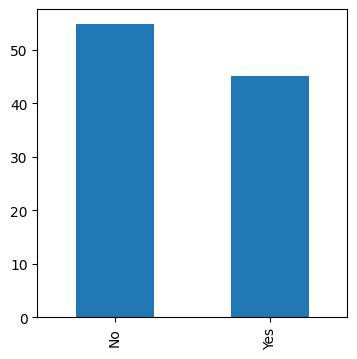

In [7]:
Attack_percentages = data['Target Attack'].value_counts(normalize=True) * 100
Attack_percentages.index = ['No',"Yes"]
Attack_percentages.plot.bar(figsize=(4, 4))
Attack_percentages

#### Statistical analysis of data

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268074 entries, 0 to 268073
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   timestamp         268074 non-null  object 
 1   FQDN_count        268074 non-null  int64  
 2   subdomain_length  268074 non-null  int64  
 3   upper             268074 non-null  int64  
 4   lower             268074 non-null  int64  
 5   numeric           268074 non-null  int64  
 6   entropy           268074 non-null  float64
 7   special           268074 non-null  int64  
 8   labels            268074 non-null  int64  
 9   labels_max        268074 non-null  int64  
 10  labels_average    268074 non-null  float64
 11  longest_word      268066 non-null  object 
 12  sld               268074 non-null  object 
 13  len               268074 non-null  int64  
 14  subdomain         268074 non-null  int64  
 15  Target Attack     268074 non-null  int64  
dtypes: float64(2), int64

In [9]:
data.isnull().sum()

timestamp           0
FQDN_count          0
subdomain_length    0
upper               0
lower               0
numeric             0
entropy             0
special             0
labels              0
labels_max          0
labels_average      0
longest_word        8
sld                 0
len                 0
subdomain           0
Target Attack       0
dtype: int64

In [10]:
data.describe()

,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,len,subdomain,Target Attack
count,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000
mean,22.286596,6.059021,0.845420,10.410014,6.497586,2.485735,4.533577,4.788823,8.252233,4.802239,12.576714,0.753497,0.549024
std,6.001205,3.899505,4.941929,3.207725,4.499866,0.407709,2.187683,1.803256,4.415355,4.573066,4.177828,0.430975,0.497592
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.219195,0.000000,1.000000,2.000000,2.000000,2.000000,0.000000,0.000000
25%,18.000000,3.000000,0.000000,10.000000,0.000000,2.054029,2.000000,3.000000,7.000000,3.166667,11.000000,1.000000,0.000000
50%,24.000000,7.000000,0.000000,10.000000,8.000000,2.570417,6.000000,6.000000,7.000000,3.666667,12.000000,1.000000,1.000000
75%,27.000000,10.000000,0.000000,10.000000,10.000000,2.767195,6.000000,6.000000,7.000000,4.000000,14.000000,1.000000,1.000000
max,36.000000,23.000000,32.000000,34.000000,12.000000,4.216847,7.000000,7.000000,32.000000,32.000000,33.000000,1.000000,1.000000


In [11]:
data.nunique()

timestamp           35924
FQDN_count             34
subdomain_length       24
upper                   5
lower                  34
numeric                13
entropy               630
special                 8
labels                  7
labels_max             31
labels_average         73
longest_word         6224
sld                 11112
len                    32
subdomain               2
Target Attack           2
dtype: int64

In [12]:
numerical_data = data.copy()
numerical_data.drop(["timestamp","longest_word","sld"], axis=1, inplace = True)
numerical_data.head()

,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,len,subdomain,Target Attack
0,27,10,0,10,11,2.570417,6,6,7,3.666667,14,1,1
1,27,10,0,10,11,2.767195,6,6,7,3.666667,14,1,1
2,26,9,0,10,10,2.742338,6,6,7,3.500000,13,1,0
3,27,10,0,10,11,2.570417,6,6,7,3.666667,14,1,1
4,15,9,0,11,0,2.929439,4,3,5,4.333333,15,1,1


### Histogram

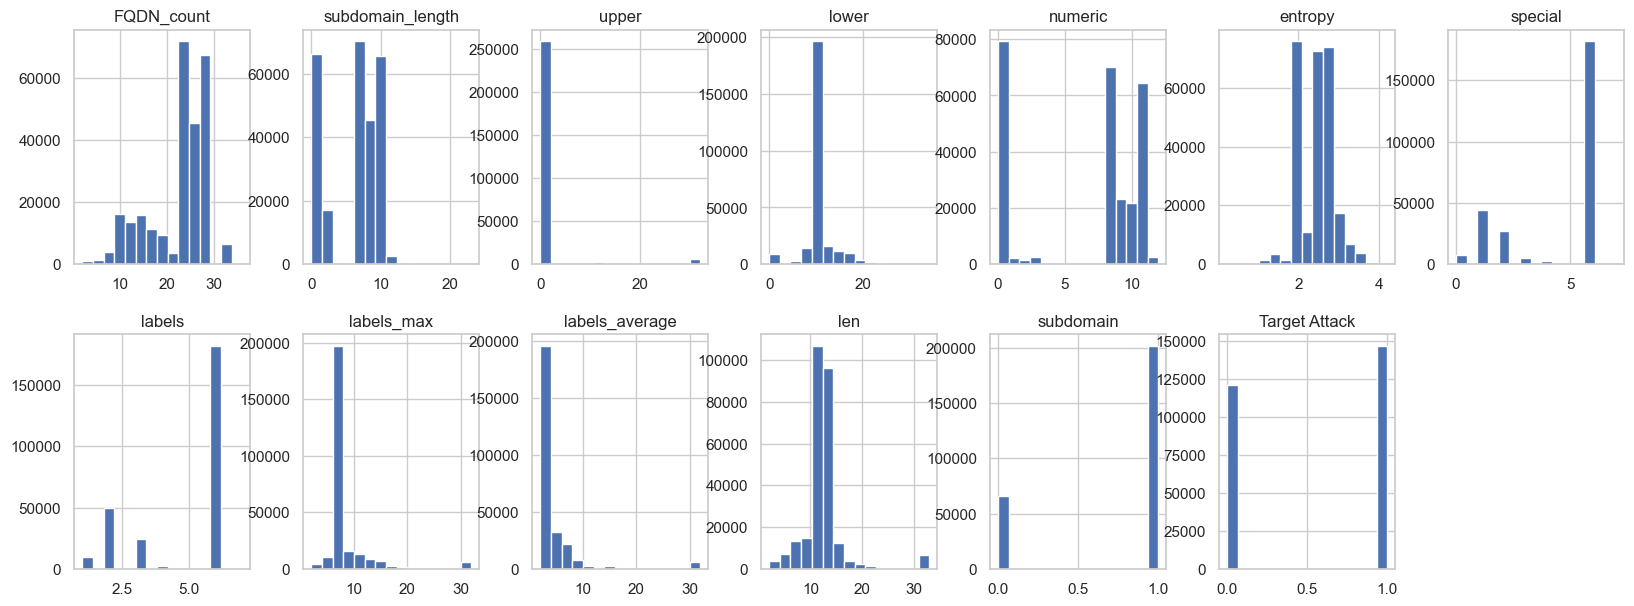

In [13]:
sns.set(style="whitegrid")  
numerical_data.hist(bins=15, figsize=(20, 7), layout=(2, 7));

### Boxplots

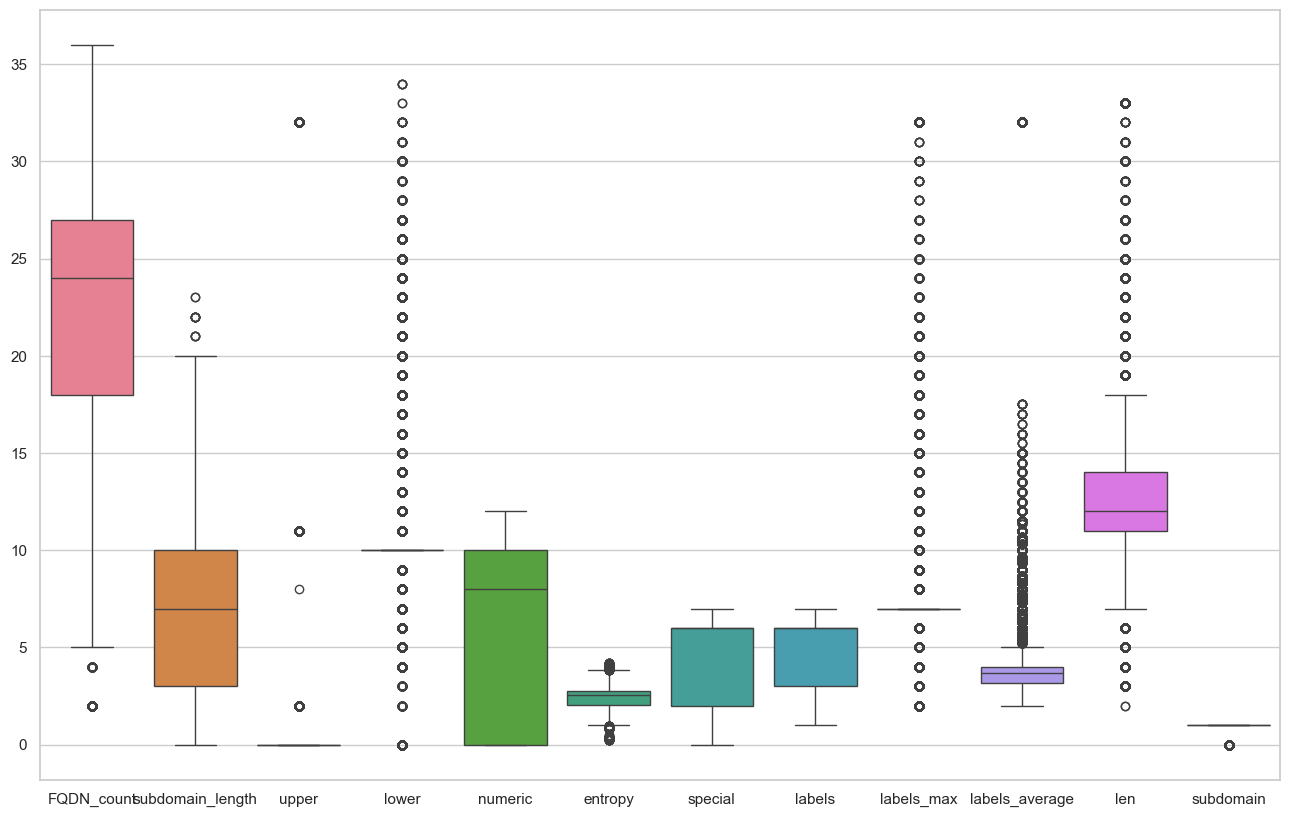

In [16]:
plt.figure(figsize=(16, 10), dpi=100)
sns.set(style="whitegrid")  
sns.boxplot(data=data.iloc[:,:-1])

plt.show()

In [17]:
numerical_data.skew()

FQDN_count         -1.101731
subdomain_length   -0.590480
upper               5.988737
lower               0.343449
numeric            -0.594384
entropy            -0.140156
special            -0.902972
labels             -0.903680
labels_max          3.979910
labels_average      5.087081
len                 2.634801
subdomain          -1.176397
Target Attack      -0.197046
dtype: float64

In [19]:
def plot_features(data, columns, skew_type, figsize=(10, 10)):
    fig, axes = plt.subplots(2, 2, figsize=figsize)
    
    for i, feature in enumerate(columns):
        ax = axes[i // 2, i % 2]
        data[feature].plot.kde(ax=ax)
        ax.set_title(f'{feature} feature kde ({skew_type} skewed)')
        ax.set_ylabel('Density')
        ax.set_xlabel(feature)
    
    plt.tight_layout()
    plt.show()

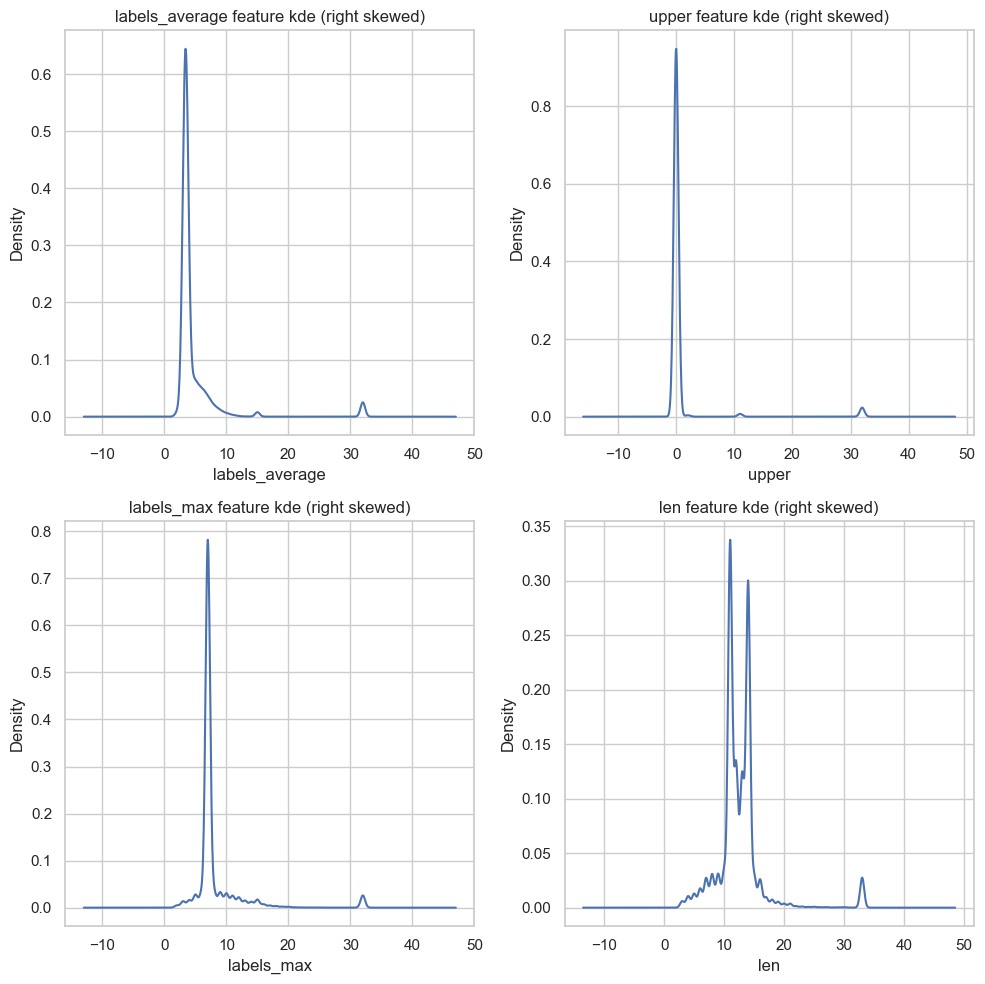

In [20]:
# Right Skew
right_skew_cols = ['labels_average', 'upper', 'labels_max', 'len']
plot_features(data, right_skew_cols, 'right')

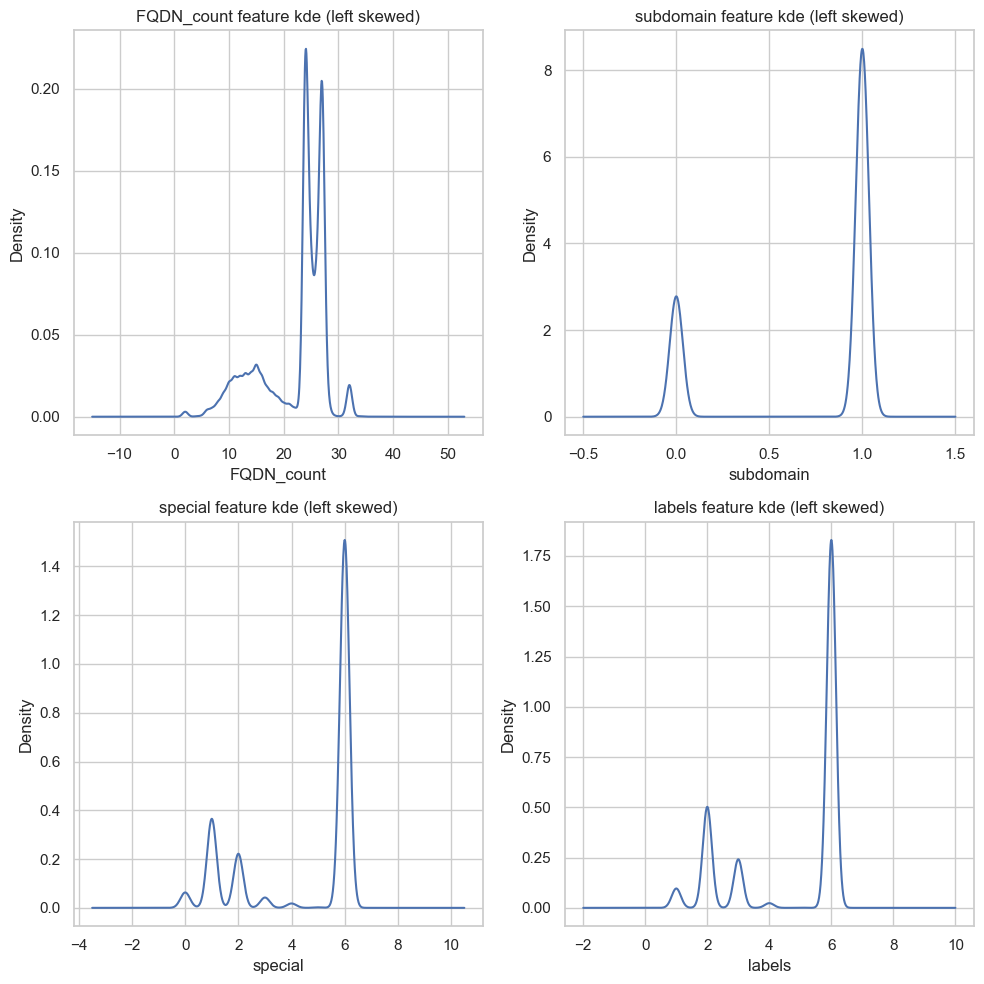

In [21]:

# Left Skew
left_skew_cols = ['FQDN_count', 'subdomain', 'special', 'labels']
plot_features(data, left_skew_cols, 'left')


# Data Cleansing and Feature creation 


### Data Cleansing

In [22]:
data.isnull().sum()

timestamp           0
FQDN_count          0
subdomain_length    0
upper               0
lower               0
numeric             0
entropy             0
special             0
labels              0
labels_max          0
labels_average      0
longest_word        8
sld                 0
len                 0
subdomain           0
Target Attack       0
dtype: int64

In [23]:
data.isna().sum().any()

True

In [24]:
data.dropna(inplace=True)

In [25]:
data.isna().sum().any()

False

# check duplicate 

In [26]:
duplicate_rows = data.duplicated()
print("Number of duplicate rows:", duplicate_rows.sum())

# Drop duplicate rows if any
if duplicate_rows.sum() > 0:
    data = data.drop_duplicates()
    print("Duplicate rows dropped.")

# Continue with the rest of your data cleansing process
data.isnull().sum()


Number of duplicate rows: 91803
Duplicate rows dropped.


timestamp           0
FQDN_count          0
subdomain_length    0
upper               0
lower               0
numeric             0
entropy             0
special             0
labels              0
labels_max          0
labels_average      0
longest_word        0
sld                 0
len                 0
subdomain           0
Target Attack       0
dtype: int64

# Transform the variables that contain string values

In [27]:
data['longest_word'].value_counts()


2          64655
4          40968
C           2435
N           1847
9           1190
           ...  
onenote        1
mal            1
oke            1
ecu            1
sph            1
Name: longest_word, Length: 6224, dtype: int64

In [28]:
data['sld'].value_counts()


192                                 64258
224                                 40968
DESKTOP-3JF04TC                      1933
FHEPFCELEHFCEPFFFACACACACACACABN     1847
239                                  1190
                                    ...  
lahemal                                 1
ecu                                     1
sph                                     1
magickjewelry                           1
secureserver                            1
Name: sld, Length: 11110, dtype: int64

In [29]:
data['timestamp'].value_counts()


57:08.6    13
58:19.6    12
09:02.7    12
12:19.8    12
17:13.8    12
           ..
33:25.2     1
17:37.2     1
16:38.6     1
42:59.3     1
00:40.7     1
Name: timestamp, Length: 35924, dtype: int64

# Hash the sld feature column


In [30]:
from sklearn.feature_extraction import FeatureHasher

# Hash the sld feature column
n_sld = 4
sld_hash = FeatureHasher(n_features=n_sld, input_type="string")
sld_hashed = sld_hash.transform(data['sld'].apply(lambda x: [str(x)]))

sld_col = [f'sld_hashed_{i}' for i in range(n_sld)]
sld_hashed_df = pd.DataFrame(sld_hashed.toarray(), columns = sld_col , index = data.index)


# Hash the longest_word feature column


In [31]:
# Hash the longest_word feature column
n_lw = 4
lw_hash = FeatureHasher(n_features=n_lw, input_type="string")
lw_hashed = lw_hash.transform(data['longest_word'].apply(lambda x: [str(x)]))

lw_col = [f'lw_hashed_{i}' for i in range(n_lw)]
lw_hashed_df = pd.DataFrame(lw_hashed.toarray(), columns = lw_col, index = data.index)



In [32]:
# Collect all the features
data = pd.concat([data, sld_hashed_df, lw_hashed_df], axis=1)

In [33]:
# Drop the 'timestamp', 'longest_word', and 'sld' columns
data = data.drop(['timestamp', 'longest_word', 'sld'], axis=1)

In [34]:
data.head()

,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,...,subdomain,Target Attack,sld_hashed_0,sld_hashed_1,sld_hashed_2,sld_hashed_3,lw_hashed_0,lw_hashed_1,lw_hashed_2,lw_hashed_3
0,27,10,0,10,11,2.570417,6,6,7,3.666667,...,1,1,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,1.0
1,27,10,0,10,11,2.767195,6,6,7,3.666667,...,1,1,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,1.0
2,26,9,0,10,10,2.742338,6,6,7,3.500000,...,1,0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,1.0
3,27,10,0,10,11,2.570417,6,6,7,3.666667,...,1,1,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,1.0
4,15,9,0,11,0,2.929439,4,3,5,4.333333,...,1,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176263 entries, 0 to 268071
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   FQDN_count        176263 non-null  int64  
 1   subdomain_length  176263 non-null  int64  
 2   upper             176263 non-null  int64  
 3   lower             176263 non-null  int64  
 4   numeric           176263 non-null  int64  
 5   entropy           176263 non-null  float64
 6   special           176263 non-null  int64  
 7   labels            176263 non-null  int64  
 8   labels_max        176263 non-null  int64  
 9   labels_average    176263 non-null  float64
 10  len               176263 non-null  int64  
 11  subdomain         176263 non-null  int64  
 12  Target Attack     176263 non-null  int64  
 13  sld_hashed_0      176263 non-null  float64
 14  sld_hashed_1      176263 non-null  float64
 15  sld_hashed_2      176263 non-null  float64
 16  sld_hashed_3      17

# Feature Filtering with more than 2 methods 


In [36]:
# Feature Selection with Mutual Information
X = data.drop(columns=['Target Attack'])
y = data['Target Attack']


In [37]:
k_best_mutual = SelectKBest(mutual_info_classif, k=11)
k_best_mutual.fit(X, y)
selected_feature_names_mutual = X.columns[k_best_mutual.get_support()]

# Perform feature selection without scaling



In [38]:
selected_feature_names_mutual

Index(['FQDN_count', 'subdomain_length', 'lower', 'numeric', 'entropy',
       'special', 'labels', 'labels_max', 'labels_average', 'len',
       'subdomain'],
      dtype='object')

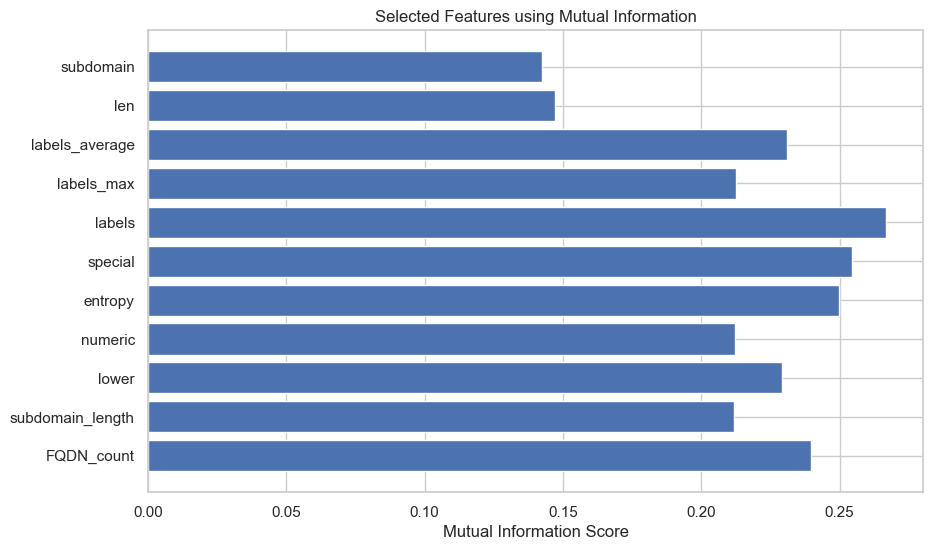

In [39]:
# Plot the selected features for Mutual Information
plt.figure(figsize=(10, 6))
plt.barh(selected_feature_names_mutual, k_best_mutual.scores_[k_best_mutual.get_support()])
plt.xlabel('Mutual Information Score')
plt.title('Selected Features using Mutual Information')
plt.show()

In [40]:
from sklearn.feature_selection import RFE


In [41]:
rf_classifier = RandomForestClassifier(random_state=42)

# Perform RFE with the Random Forest classifier
num_features_to_select = 11
rfe = RFE(estimator=rf_classifier, n_features_to_select=num_features_to_select)
rfe.fit(X, y)
# Get the selected features
selected_feature_indices_rfe = rfe.support_
selected_feature_names_rfe = X.columns[selected_feature_indices_rfe]


In [42]:
selected_feature_names_rfe

Index(['FQDN_count', 'subdomain_length', 'upper', 'lower', 'numeric',
       'special', 'labels', 'labels_max', 'labels_average', 'len',
       'subdomain'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

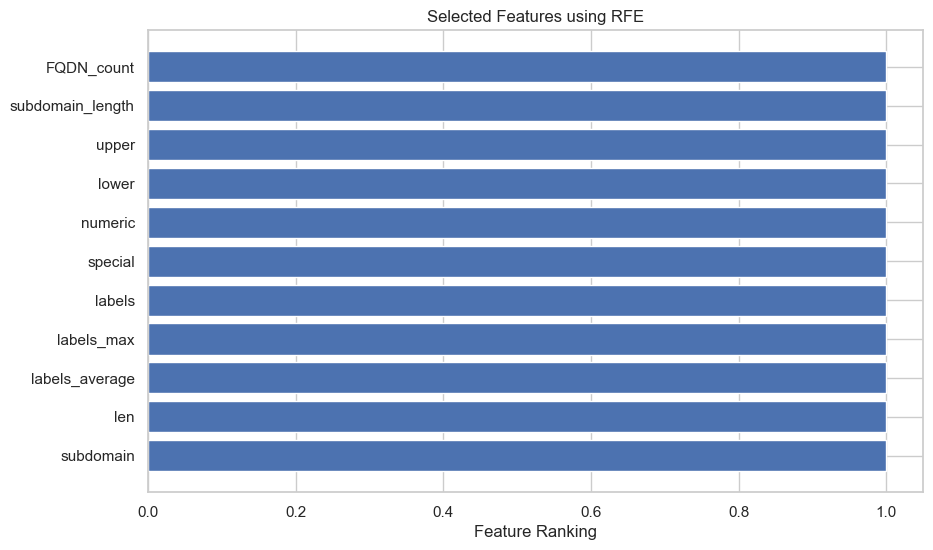

In [43]:
plt.figure(figsize=(10, 6))
plt.barh(selected_feature_names_rfe, rfe.ranking_[selected_feature_indices_rfe])
plt.xlabel('Feature Ranking')
plt.title('Selected Features using RFE')
plt.gca().invert_yaxis()
plt.show

In [44]:
# Feature Selection with ANOVA
k_best_anova = SelectKBest(f_classif, k=11)
k_best_anova.fit(X, y)
selected_feature_names_anova = X.columns[k_best_anova.get_support()]

In [45]:
selected_feature_names_anova

Index(['FQDN_count', 'subdomain_length', 'upper', 'lower', 'numeric',
       'special', 'labels', 'len', 'subdomain', 'lw_hashed_0', 'lw_hashed_3'],
      dtype='object')

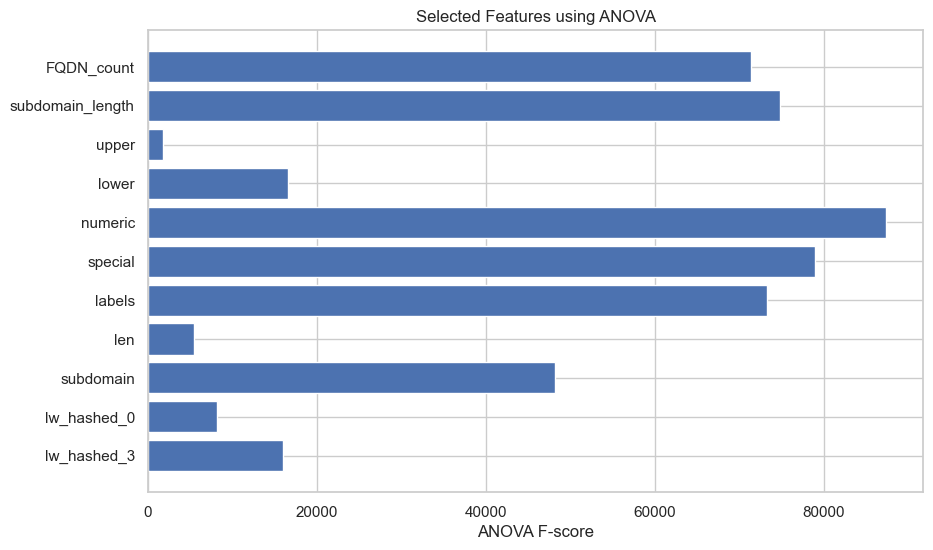

In [46]:
# Plot the selected features for ANOVA
plt.figure(figsize=(10, 6))
plt.barh(selected_feature_names_anova, k_best_anova.scores_[k_best_anova.get_support()])
plt.xlabel('ANOVA F-score')
plt.title('Selected Features using ANOVA')
plt.gca().invert_yaxis()
plt.show()

In [47]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [48]:
# Apply MinMaxScaler after splitting
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [49]:

# Convert scaled arrays back to DataFrame for ease of use
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)


In [50]:
X_train_scaled_df

,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,len,subdomain,sld_hashed_0,sld_hashed_1,sld_hashed_2,sld_hashed_3,lw_hashed_0,lw_hashed_1,lw_hashed_2,lw_hashed_3
158375,0.647059,0.304348,0.0,0.294118,0.666667,0.458978,0.857143,0.833333,0.166667,0.038889,0.290323,1.0,0.5,0.5,1.0,0.5,0.0,0.5,0.5,0.5
25172,0.647059,0.304348,0.0,0.294118,0.666667,0.458978,0.857143,0.833333,0.166667,0.038889,0.290323,1.0,0.5,0.5,1.0,0.5,0.0,0.5,0.5,0.5
76833,0.588235,0.000000,0.0,0.588235,0.000000,0.757591,0.285714,0.166667,0.533333,0.283333,0.548387,0.0,0.5,0.5,0.5,1.0,0.5,0.5,0.5,1.0
70579,0.764706,0.000000,0.0,0.794118,0.000000,0.805102,0.142857,0.166667,0.733333,0.383333,0.741935,0.0,0.0,0.5,0.5,0.5,0.0,0.5,0.5,0.5
35467,0.735294,0.434783,0.0,0.294118,0.916667,0.588151,0.857143,0.833333,0.166667,0.055556,0.387097,1.0,0.5,0.5,0.0,0.5,0.5,0.5,0.5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156570,0.352941,0.130435,0.0,0.352941,0.000000,0.524070,0.285714,0.333333,0.133333,0.066667,0.258065,1.0,0.5,0.5,1.0,0.5,0.5,1.0,0.5,0.5
130166,0.735294,0.434783,0.0,0.294118,0.916667,0.588151,0.857143,0.833333,0.166667,0.055556,0.387097,1.0,0.5,0.5,0.0,0.5,0.5,0.5,0.5,1.0
177612,0.294118,0.000000,0.0,0.294118,0.000000,0.517853,0.285714,0.166667,0.200000,0.116667,0.225806,0.0,0.0,0.5,0.5,0.5,0.5,0.0,0.5,0.5
205793,0.676471,0.347826,0.0,0.294118,0.750000,0.584705,0.857143,0.833333,0.166667,0.044444,0.322581,1.0,0.5,0.5,0.0,0.5,0.5,0.5,0.5,1.0


In [51]:
X_test_scaled_df

,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,len,subdomain,sld_hashed_0,sld_hashed_1,sld_hashed_2,sld_hashed_3,lw_hashed_0,lw_hashed_1,lw_hashed_2,lw_hashed_3
217914,0.352941,0.130435,0.0,0.352941,0.000000,0.623736,0.285714,0.333333,0.166667,0.066667,0.290323,1.0,0.5,1.0,0.5,0.5,0.5,0.5,0.5,1.0
207691,0.382353,0.000000,0.0,0.411765,0.000000,0.642132,0.142857,0.166667,0.300000,0.166667,0.322581,0.0,0.0,0.5,0.5,0.5,0.5,0.5,0.0,0.5
201252,0.500000,0.130435,0.0,0.500000,0.000000,0.657195,0.285714,0.333333,0.300000,0.122222,0.419355,1.0,0.5,1.0,0.5,0.5,0.5,0.5,1.0,0.5
97952,0.735294,0.434783,0.0,0.294118,0.916667,0.579392,0.857143,0.833333,0.166667,0.055556,0.387097,1.0,0.5,0.5,0.0,0.5,0.5,0.5,0.5,1.0
223928,0.735294,0.434783,0.0,0.294118,0.916667,0.637374,0.857143,0.833333,0.166667,0.055556,0.387097,1.0,0.5,0.5,0.0,0.5,0.5,0.5,0.5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34887,0.352941,0.000000,0.0,0.382353,0.000000,0.686384,0.142857,0.166667,0.266667,0.150000,0.290323,0.0,0.5,0.5,1.0,0.5,0.0,0.5,0.5,0.5
215548,0.647059,0.304348,0.0,0.294118,0.666667,0.458978,0.857143,0.833333,0.166667,0.038889,0.290323,1.0,0.5,0.5,1.0,0.5,0.0,0.5,0.5,0.5
10921,0.735294,0.434783,0.0,0.294118,0.916667,0.588151,0.857143,0.833333,0.166667,0.055556,0.387097,1.0,0.5,0.5,0.0,0.5,0.5,0.5,0.5,1.0
30836,0.558824,0.130435,0.0,0.529412,0.000000,0.711312,0.428571,0.500000,0.300000,0.083333,0.419355,1.0,0.5,0.5,1.0,0.5,0.5,0.5,0.5,1.0


In [52]:
def train_evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return f1_score(y_test, y_pred)


In [53]:
rf_model = RandomForestClassifier(random_state=42)
f1_score_rf_original = train_evaluate_model(rf_model, X_train_scaled_df, X_test_scaled_df, y_train, y_test)
print("F1 Score for Original Data with Random Forest:", f1_score_rf_original)


F1 Score for Original Data with Random Forest: 0.8026070763500931


In [54]:
f1_score_rf_mutual = train_evaluate_model(rf_model, X_train_scaled_df[selected_feature_names_mutual], X_test_scaled_df[selected_feature_names_mutual], y_train, y_test)
print("F1 Score for Mutual Information with Random Forest:", f1_score_rf_mutual)


F1 Score for Mutual Information with Random Forest: 0.8025296442687747


In [55]:
f1_score_rf_rfe = train_evaluate_model(rf_model, X_train_scaled_df[selected_feature_names_rfe], X_test_scaled_df[selected_feature_names_rfe], y_train, y_test)
print("F1 Score for RFE with Random Forest:", f1_score_rf_rfe)


F1 Score for RFE with Random Forest: 0.8024730389573893


In [56]:
f1_score_rf_anova = train_evaluate_model(rf_model, X_train_scaled_df[selected_feature_names_anova], X_test_scaled_df[selected_feature_names_anova], y_train, y_test)
print("F1 Score for ANOVA with Random Forest:", f1_score_rf_anova)


F1 Score for ANOVA with Random Forest: 0.8025506798299546


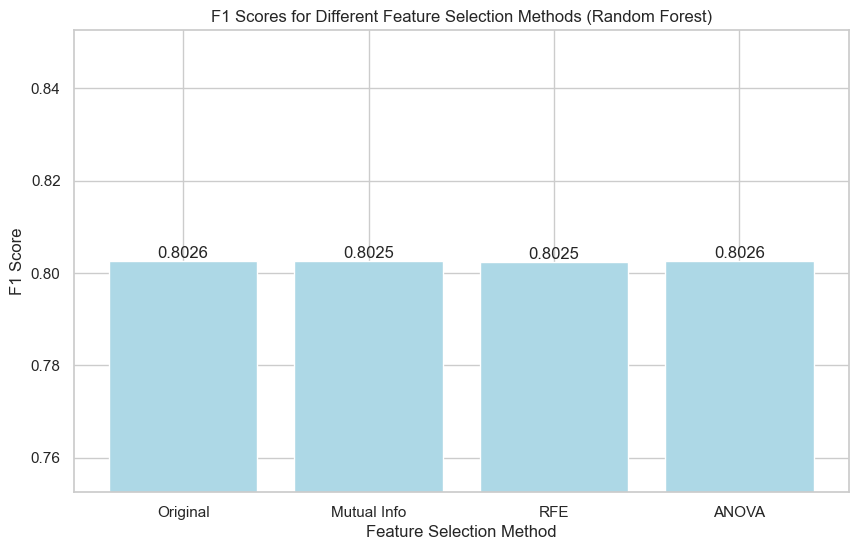

In [57]:
f1_scores_rf = {
    "Original": f1_score_rf_original,
    "Mutual Info": f1_score_rf_mutual,
    "RFE": f1_score_rf_rfe,
    "ANOVA": f1_score_rf_anova
}

# Plotting the F1 scores
plt.figure(figsize=(10, 6))
plt.bar(f1_scores_rf.keys(), f1_scores_rf.values(), color='lightblue')
plt.xlabel('Feature Selection Method')
plt.ylabel('F1 Score')
plt.title('F1 Scores for Different Feature Selection Methods (Random Forest)')
plt.ylim([min(f1_scores_rf.values()) - 0.05, max(f1_scores_rf.values()) + 0.05])

for method, score in f1_scores_rf.items():
    plt.text(method, score, f'{score:.4f}', ha='center', va='bottom')

plt.show()


In [58]:
xgb_model = xgb.XGBClassifier(random_state=42)
f1_score_xgb_original = train_evaluate_model(xgb_model, X_train_scaled_df, X_test_scaled_df, y_train, y_test)
print("F1 Score for Original Data with XGBoost:", f1_score_xgb_original)


F1 Score for Original Data with XGBoost: 0.8026142412902546


In [59]:
f1_score_xgb_mutual = train_evaluate_model(xgb_model, X_train_scaled_df[selected_feature_names_mutual], X_test_scaled_df[selected_feature_names_mutual], y_train, y_test)
print("F1 Score for Mutual Information with XGBoost:", f1_score_xgb_mutual)


F1 Score for Mutual Information with XGBoost: 0.8025296442687747


In [60]:
f1_score_xgb_rfe = train_evaluate_model(xgb_model, X_train_scaled_df[selected_feature_names_rfe], X_test_scaled_df[selected_feature_names_rfe], y_train, y_test)
print("F1 Score for RFE with XGBoost:", f1_score_xgb_rfe)


F1 Score for RFE with XGBoost: 0.8024240295099244


In [61]:
f1_score_xgb_anova = train_evaluate_model(xgb_model, X_train_scaled_df[selected_feature_names_anova], X_test_scaled_df[selected_feature_names_anova], y_train, y_test)
print("F1 Score for ANOVA with XGBoost:", f1_score_xgb_anova)


F1 Score for ANOVA with XGBoost: 0.8025647782169519


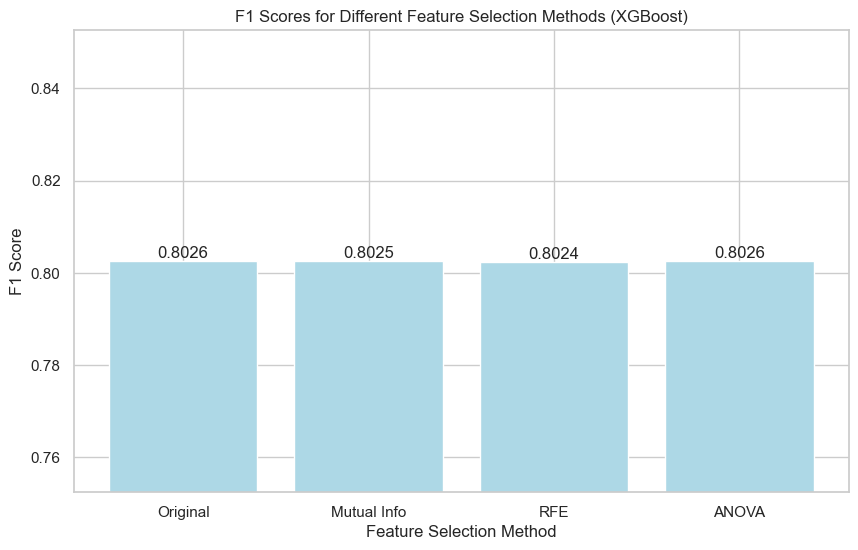

In [62]:

# Assuming you have already calculated these F1 scores in previous cells
f1_scores_xgb = {
    "Original": f1_score_xgb_original,
    "Mutual Info": f1_score_xgb_mutual,
    "RFE": f1_score_xgb_rfe,
    "ANOVA": f1_score_xgb_anova
}

# Plotting the F1 scores
plt.figure(figsize=(10, 6))
plt.bar(f1_scores_xgb.keys(), f1_scores_xgb.values(), color='lightblue')
plt.xlabel('Feature Selection Method')
plt.ylabel('F1 Score')
plt.title('F1 Scores for Different Feature Selection Methods (XGBoost)')
plt.ylim([min(f1_scores_xgb.values()) - 0.05, max(f1_scores_xgb.values()) + 0.05])

for method, score in f1_scores_xgb.items():
    plt.text(method, score, f'{score:.4f}', ha='center', va='bottom')

plt.show()


In [63]:
X_train_anova = X_train_scaled_df[selected_feature_names_anova]
X_test_anova = X_test_scaled_df[selected_feature_names_anova]


In [64]:
# ANOVA-selected features
X_train_anova = X_train_scaled_df[selected_feature_names_anova]
X_test_anova = X_test_scaled_df[selected_feature_names_anova]

# Parameters for GridSearchCV
param_grid_rf = {
    'n_estimators': [100, 300],  # fewer options
    'max_depth': [None, 10, 15],  # limit depth options
    'min_samples_split': [2, 4],  # fewer split options
    'min_samples_leaf': [1, 2]    # fewer leaf options
}

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Conduct Grid Search

grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=3, scoring='f1', n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train_anova, y_train)

# Best model from grid search
best_rf_model = grid_search_rf.best_estimator_

# Evaluate on the test set
y_pred_rf = best_rf_model.predict(X_test_anova)
f1_score_rf = f1_score(y_test, y_pred_rf)

print("Best Parameters for RandomForest:", grid_search_rf.best_params_)
print("F1 Score for RandomForest on Test Set:", f1_score_rf)


Fitting 3 folds for each of 24 candidates, totalling 72 fits


Best Parameters for RandomForest: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 300}
F1 Score for RandomForest on Test Set: 0.8025647782169519


In [65]:
param_grid_xgb = {
    'n_estimators': [150, 200],     
    'max_depth': [5, 7],            
    'learning_rate': [0.1, 0.15],   
    'subsample': [0.8, 0.9],       
    'colsample_bytree': [0.7, 0.8]  
}

# Initialize the XGBoost Classifier
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Conduct Grid Search with the specified parameters
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=2, scoring='f1', n_jobs=-1, verbose=2)
grid_search_xgb.fit(X_train_anova, y_train)

# Best model from the grid search
best_xgb_model = grid_search_xgb.best_estimator_

# Evaluate on the test set
y_pred_xgb = best_xgb_model.predict(X_test_anova)
f1_score_xgb = f1_score(y_test, y_pred_xgb)

print("Best Parameters for XGBoost:", grid_search_xgb.best_params_)
print("F1 Score for XGBoost on Test Set:", f1_score_xgb)


Fitting 2 folds for each of 32 candidates, totalling 64 fits
Best Parameters for XGBoost: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
F1 Score for XGBoost on Test Set: 0.8025647782169519


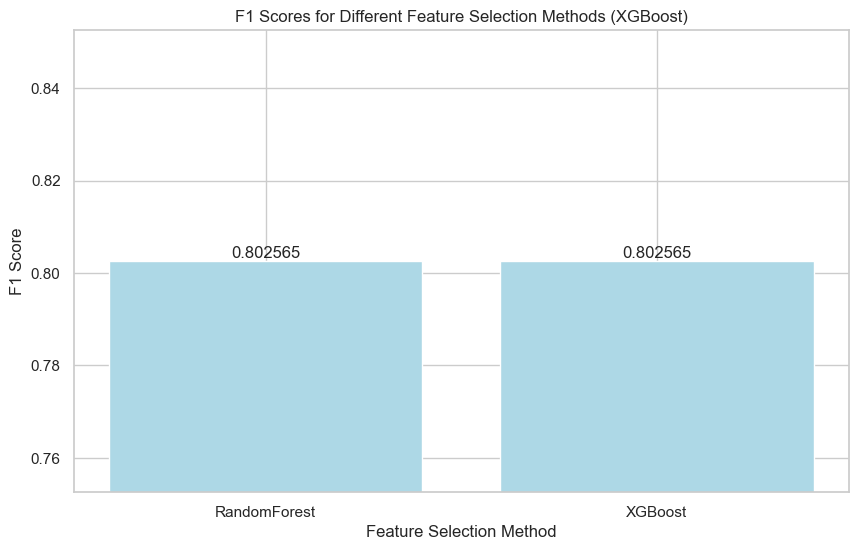

In [66]:
f1_scores_grid_search = {
    'RandomForest': f1_score_rf,
    'XGBoost': f1_score_xgb
}


# Plotting the F1 scores
plt.figure(figsize=(10, 6))
plt.bar(f1_scores_grid_search.keys(), f1_scores_grid_search.values(), color='lightblue')
plt.xlabel('Feature Selection Method')
plt.ylabel('F1 Score')
plt.title('F1 Scores for Different Feature Selection Methods (XGBoost)')
plt.ylim([min(f1_scores_grid_search.values()) - 0.05, max(f1_scores_grid_search.values()) + 0.05])

for method, score in f1_scores_grid_search.items():
    plt.text(method, score, f'{score:.6f}', ha='center', va='bottom')

plt.show()


In [67]:

# Identifying Common Features
common_features = list(set(selected_feature_names_mutual) & set(selected_feature_names_rfe) & set(selected_feature_names_anova))
print("Common Features:", common_features)


Common Features: ['len', 'subdomain_length', 'subdomain', 'numeric', 'special', 'FQDN_count', 'lower', 'labels']


In [68]:

# Evaluating Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
f1_score_rf_common = train_evaluate_model(rf_model, X_train_scaled_df[common_features], X_test_scaled_df[common_features], y_train, y_test)
print("F1 Score for Common Features with Random Forest:", f1_score_rf_common)



F1 Score for Common Features with Random Forest: 0.8024942912348498


In [69]:
# Evaluating XGBoost Classifier
xgb_model = xgb.XGBClassifier(random_state=42)
f1_score_xgb_common = train_evaluate_model(xgb_model, X_train_scaled_df[common_features], X_test_scaled_df[common_features], y_train, y_test)
print("F1 Score for Common Features with XGBoost:", f1_score_xgb_common)

F1 Score for Common Features with XGBoost: 0.8024665331506272


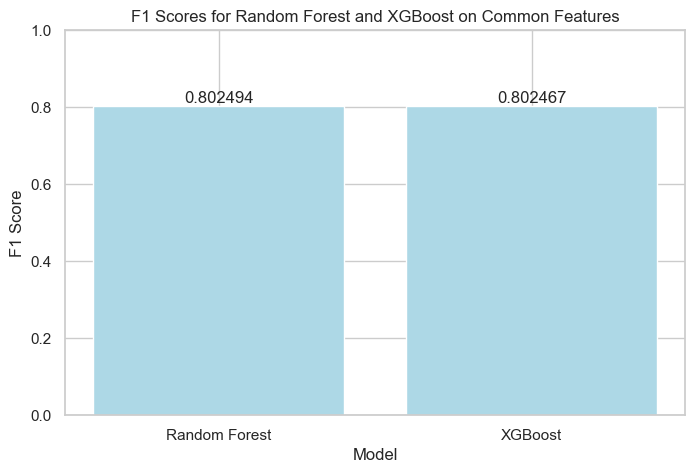

In [70]:
import matplotlib.pyplot as plt

f1_scores = {
    'Random Forest': f1_score_rf_common,
    'XGBoost': f1_score_xgb_common
}

# Plotting the F1 scores
plt.figure(figsize=(8, 5))
plt.bar(f1_scores.keys(), f1_scores.values(), color=['lightblue', 'lightblue'])
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('F1 Scores for Random Forest and XGBoost on Common Features')
plt.ylim([0, 1])  # F1 score range is from 0 to 1
for model, score in f1_scores.items():
    plt.text(model, score, f'{score:.6f}', ha='center', va='bottom')

plt.show()


In [80]:
from sklearn.model_selection import GridSearchCV

# Parameter grid for Random Forest
param_grid_rf_common = {
   'n_estimators': [100, 200, 300],  
    'max_depth': [None, 10, 20, 30],  
    'min_samples_split': [2, 5, 10],  
}

# Initialize the RandomForestClassifier
rf_common = RandomForestClassifier(random_state=42)

# Conduct Grid Search
grid_search_rf_common = GridSearchCV(estimator=rf_common, param_grid=param_grid_rf_common, cv=3, scoring='f1', n_jobs=-1, verbose=2)
grid_search_rf_common.fit(X_train_scaled_df[common_features], y_train)

# Best model from grid search
best_rf_model_common = grid_search_rf_common.best_estimator_
f1_score_rf_best_common = train_evaluate_model(best_rf_model_common, X_train_scaled_df[common_features], X_test_scaled_df[common_features], y_train, y_test)

print("Best Parameters for RandomForest:", grid_search_rf_common.best_params_)
print("Best F1 Score for RandomForest:", f1_score_rf_best_common)


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Parameters for RandomForest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 300}
Best F1 Score for RandomForest: 0.8025083876407454


In [85]:
# Parameter grid for XGBoost
param_grid_xgb_common = {
    'n_estimators': [50, 150,300],      
    'max_depth': [4, 6],               
    'learning_rate': [0.01, 0.05,0.2],   
    'colsample_bytree': [0.8, 1]          

}

# Initialize the XGBoost Classifier
xgb_model_common = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Conduct Grid Search
grid_search_xgb_common = GridSearchCV(estimator=xgb_model_common, param_grid=param_grid_xgb_common, cv=3, scoring='f1', n_jobs=-1, verbose=1)
grid_search_xgb_common.fit(X_train_scaled_df[common_features], y_train)

# Best model from grid search
best_xgb_model_common = grid_search_xgb_common.best_estimator_
f1_score_xgb_best_common = train_evaluate_model(best_xgb_model_common, X_train_scaled_df[common_features], X_test_scaled_df[common_features], y_train, y_test)

print("Best Parameters for XGBoost:", grid_search_xgb_common.best_params_)
print("Best F1 Score for XGBoost:", f1_score_xgb_best_common)




Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Parameters for XGBoost: {'colsample_bytree': 1, 'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 300}
Best F1 Score for XGBoost: 0.8024665331506272


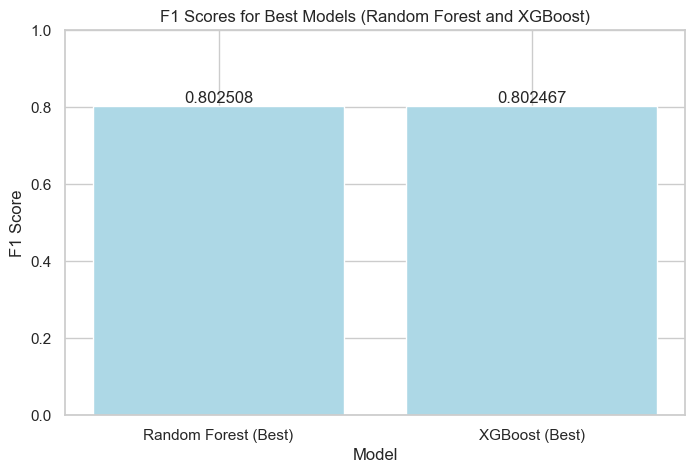

In [87]:
import matplotlib.pyplot as plt

f1_scores_best_models = {
    'Random Forest (Best)': f1_score_rf_best_common,
    'XGBoost (Best)': f1_score_xgb_best_common
}

# Plotting the F1 scores
plt.figure(figsize=(8, 5))
plt.bar(f1_scores_best_models.keys(), f1_scores_best_models.values(), color=['lightblue', 'lightblue'])
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('F1 Scores for Best Models (Random Forest and XGBoost)')
plt.ylim([0, 1])  # F1 score range is from 0 to 1
for model, score in f1_scores_best_models.items():
    plt.text(model, score, f'{score:.6f}', ha='center', va='bottom')
plt.show()


In [88]:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import pickle


In [89]:
common_features

['len',
 'subdomain_length',
 'subdomain',
 'numeric',
 'special',
 'FQDN_count',
 'lower',
 'labels']

In [93]:
best_rf_model_common

RandomForestClassifier(min_samples_split=5, n_estimators=300, random_state=42)

In [91]:
pipeline = Pipeline([
    ('selected_features',common_features),
    ('scaler', scaler),
    ('classifier', best_rf_model_common)
])




In [95]:
# Save the trained pipeline to a pickle file
with open('THE_STATIC_MODEL.pkl', 'wb') as file:
    pickle.dump(pipeline, file)

print("Trained model saved as 'trained_model.pkl'")

Trained model saved as 'trained_model.pkl'
